In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import cv2
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt

In [ ]:
translations = ['cavallo','elefante','gallina','cane','farfalla']
X = []
Y = []
for i in range(5):
    path = '/content/drive/MyDrive/animal_10/raw-img/' + translations[i]
    
    for file in os.listdir(path):
        try: 
            imgArray = cv2.imread(os.path.join(path, file))
            
#             resize images so they are all square and consistent
            imgArray = cv2.resize(imgArray, (100,100))
    
            X.append(imgArray)
            Y.append(i)
        except:
            pass

In [ ]:
X = np.array(X)
Y = np.array(Y)
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (14086, 100, 100, 3)
Y shape:  (14086,)


In [ ]:
xtrain,xtest, ytrain,ytest=train_test_split(X,Y,test_size=0.1, random_state=42)

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(12677, 100, 100, 3)
(12677,)
(1409, 100, 100, 3)
(1409,)


In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(12677, 100, 100, 3)
(12677,)
(1409, 100, 100, 3)
(1409,)


In [ ]:
input_shape = xtrain[0].shape
num_classes = 5

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(units=num_classes, activation = 'softmax'))

#model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.compile(optimizer=tensorflow.keras.optimizers.Adam(), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.summary()

TypeError: ignored

In [ ]:
history = model.fit(x = xtrain, 
    y = ytrain,
    epochs = 15,
    batch_size = 1000,
    validation_split=0.1,
    verbose=1)

Epoch 1/15
12/12 [==============================] - 18s 320ms/step - loss: 2.9917 - accuracy: 0.2625 - val_loss: 1.5550 - val_accuracy: 0.2524
Epoch 2/15
12/12 [==============================] - 2s 149ms/step - loss: 1.5263 - accuracy: 0.3091 - val_loss: 1.4582 - val_accuracy: 0.4085
Epoch 3/15
12/12 [==============================] - 2s 149ms/step - loss: 1.4025 - accuracy: 0.4319 - val_loss: 1.3203 - val_accuracy: 0.4732
Epoch 4/15
12/12 [==============================] - 2s 150ms/step - loss: 1.2554 - accuracy: 0.5253 - val_loss: 1.1673 - val_accuracy: 0.5513
Epoch 5/15
12/12 [==============================] - 2s 162ms/step - loss: 1.0862 - accuracy: 0.5884 - val_loss: 1.0769 - val_accuracy: 0.5820
Epoch 6/15
12/12 [==============================] - 2s 163ms/step - loss: 0.9709 - accuracy: 0.6331 - val_loss: 0.9911 - val_accuracy: 0.6262
Epoch 7/15
12/12 [==============================] - 2s 192ms/step - loss: 0.8725 - accuracy: 0.6797 - val_loss: 0.9699 - val_accuracy: 0.6451
Epoch

In [ ]:
model.save('mymodel.pkl')

In [ ]:
model.save('my_model.h5')

In [ ]:
from keras.models import save_model
save_model(model, "model.h5")

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
history = pd.DataFrame(history.history)
display(history)

,loss,accuracy,val_loss,val_accuracy
0,2.991666,0.262512,1.554980,0.252366
1,1.526288,0.309142,1.458180,0.408517
2,1.402511,0.431852,1.320286,0.473186
3,1.255364,0.525287,1.167287,0.551262
4,1.086236,0.588395,1.076943,0.582019
5,0.970940,0.633097,0.991075,0.626183
6,0.872490,0.679727,0.969921,0.645110
7,0.810935,0.704794,0.941195,0.649842
8,0.738145,0.734946,0.893731,0.680599
9,0.683296,0.764046,0.857170,0.688486


In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

In [ ]:
label_names = ['dog', 'horse', 'elephant', 'butterfly', 'chicken']

In [ ]:
pred=model.predict("OIP-_3S-iEDMQnko7ZHgq_FTcwHaEL.jpeg")

IndexError: ignored

45/45 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         dog       0.65      0.67      0.66       258
       horse       0.68      0.51      0.58       143
    elephant       0.72      0.67      0.69       308
   butterfly       0.71      0.76      0.73       498
     chicken       0.80      0.86      0.83       202

    accuracy                           0.71      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.71      0.71      0.71      1409



Text(0.5, 1.0, 'Confusion Matrix')

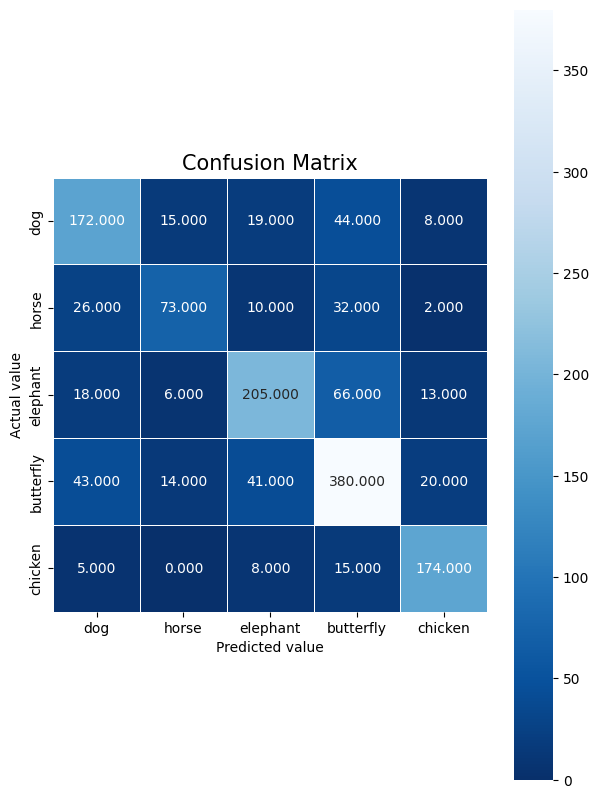

In [ ]:
predictions = model.predict(xtest)

predictions = np.argmax(predictions, axis = 1)

print(classification_report(ytest, predictions, target_names = label_names))
    
cm = confusion_matrix(ytest, predictions)

plt.figure(figsize=(7,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=label_names, yticklabels=label_names)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.title('Confusion Matrix', size = 15)

In [ ]:
predictions

array([0, 3, 3, ..., 3, 3, 3])

In [ ]:
xtest

array([[[[0.03137255, 0.07058824, 0.01960784],
         [0.05882353, 0.09803922, 0.04705882],
         [0.08235294, 0.12156863, 0.07058824],
         ...,
         [0.09803922, 0.20392157, 0.1254902 ],
         [0.10588235, 0.21176471, 0.13333333],
         [0.14117647, 0.24705882, 0.16862745]],

        [[0.05490196, 0.10196078, 0.02745098],
         [0.08627451, 0.13333333, 0.05882353],
         [0.10980392, 0.15686275, 0.08235294],
         ...,
         [0.16470588, 0.2627451 , 0.18431373],
         [0.18039216, 0.27843137, 0.2       ],
         [0.12941176, 0.22745098, 0.14901961]],

        [[0.11372549, 0.16862745, 0.0745098 ],
         [0.11372549, 0.16862745, 0.0745098 ],
         [0.14117647, 0.19607843, 0.10196078],
         ...,
         [0.10980392, 0.20784314, 0.12941176],
         [0.10588235, 0.20392157, 0.1254902 ],
         [0.08235294, 0.18039216, 0.10196078]],

        ...,

        [[0.29411765, 0.41176471, 0.2745098 ],
         [0.2627451 , 0.38039216, 0.24313725]

In [ ]:
predictions = model.predict(xtest)

In [ ]:
predictions

array([0, 0, 0, ..., 3, 3, 0])

In [ ]:
import numpy as np
from PIL import Image



In [ ]:
img = Image.open('/content/drive/MyDrive/animal_10/raw-img/cane/OIP-_3S-iEDMQnko7ZHgq_FTcwHaEL.jpeg')
img = img.resize((100, 100))  # resize your image to the input shape of your CNN model
img_array = np.array(img)  # convert your image to a numpy array
img_array = np.expand_dims(img_array, axis=0)


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

img_array = preprocess_input(img_array)  # apply the preprocessing function specific to your CNN model


In [ ]:
pred = model.predict(img_array)

1/1 [==============================] - 0s 20ms/step


In [ ]:
print(pred)


[[0.16627666 0.25561652 0.19313811 0.19501978 0.18994893]]


In [ ]:
class_idx = np.argmax(pred, axis=1)[0]

In [ ]:
class_names = ['dog', 'horse', 'elephant', 'butterfly', 'chicken']

In [ ]:
class_name = class_names[class_idx]

In [ ]:
print('The predicted class is:', class_name)

The predicted class is: horse
